In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM  # importing layers package , Dense layer is used to connect all layers
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [4]:
import pandas_datareader as data

In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf

start = '2013-01-01'
end = '2023-10-23'

df = yf.download('GODREJPROP.NS', start=start, end=end)


print(df.head())


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2013-01-01  299.910614  300.863892  298.306335  299.840881  292.908112   21326
2013-01-02  297.794800  309.210907  295.283722  307.095093  299.994598  102263
2013-01-03  310.489685  310.582703  304.584015  308.257629  301.130219   35222
2013-01-04  308.769135  310.164185  301.793915  302.816956  295.815399   46471
2013-01-07  299.933868  302.956451  294.028198  295.330231  288.501740   84593


In [7]:
df.shape

(2648, 6)

In [8]:
df = pd.DataFrame.dropna(df)

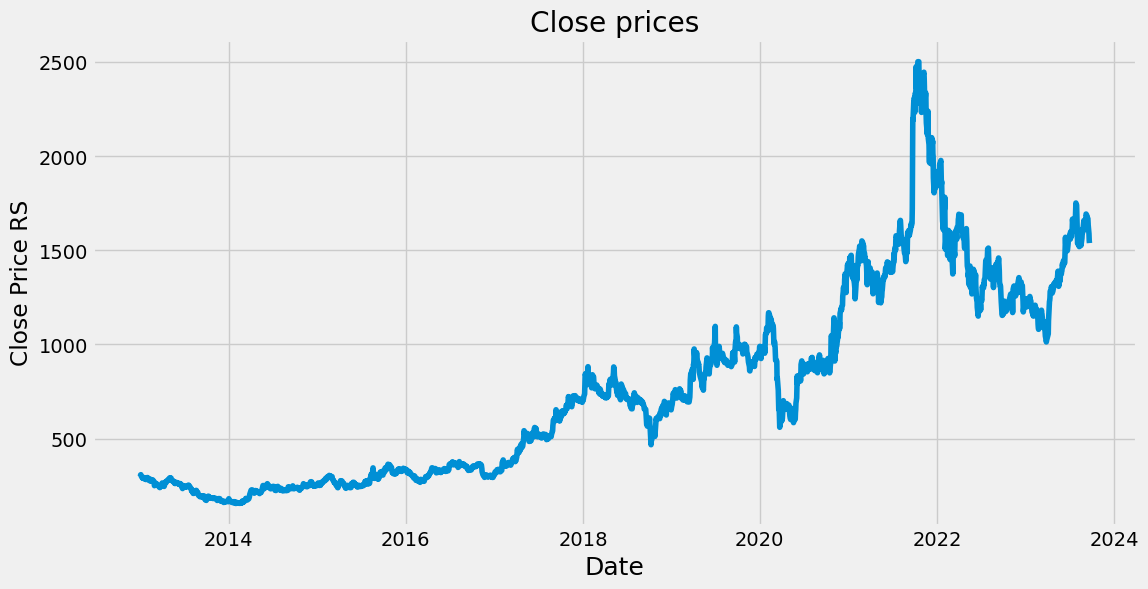

In [9]:
plt.figure(figsize=(12,6))
plt.title('Close prices')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price RS')
plt.show()

In [10]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.80)  #Math. ceil() method rounds a number rounded UP to the nearest integer.
training_data_len

2119

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.89697453],
       [-0.8828852 ],
       [-0.88062728],
       ...,
       [ 1.60570217],
       [ 1.53811251],
       [ 1.50936767]])

In [12]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(120, len(train_data)):
    x_train.append(train_data[i-70:i,0])
    y_train.append(train_data[i,0])
    if i <= 70:
        print(x_train)
        print(y_train)
        print()

In [13]:
x_train,y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1999, 70)

In [14]:
x_train.shape[0],x_train.shape[1]

(1999, 70)

In [15]:
sample=float(x_train.shape[0])

In [16]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1999, 70, 1)

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [19]:
model.fit(x_train,y_train, batch_size=60, epochs = 70)

Epoch 1/70
34/34 [==============================] - 5s 66ms/step - loss: 0.0894
Epoch 2/70
34/34 [==============================] - 3s 92ms/step - loss: 0.0074
Epoch 3/70
34/34 [==============================] - 4s 107ms/step - loss: 0.0059
Epoch 4/70
34/34 [==============================] - 4s 108ms/step - loss: 0.0052
Epoch 5/70
34/34 [==============================] - 4s 115ms/step - loss: 0.0046
Epoch 6/70
34/34 [==============================] - 4s 111ms/step - loss: 0.0043
Epoch 7/70
34/34 [==============================] - 4s 111ms/step - loss: 0.0041
Epoch 8/70
34/34 [==============================] - 3s 87ms/step - loss: 0.0039
Epoch 9/70
34/34 [==============================] - 2s 63ms/step - loss: 0.0036
Epoch 10/70
34/34 [==============================] - 2s 64ms/step - loss: 0.0035
Epoch 11/70
34/34 [==============================] - 2s 65ms/step - loss: 0.0035
Epoch 12/70
34/34 [==============================] - 2s 66ms/step - loss: 0.0035
Epoch 13/70
34/34 [=============

In [21]:
test_data = scaled_data[training_data_len - 70: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i, 0])

In [22]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [23]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 16ms/step


C:\Users\bedar\AppData\Local\Temp\ipykernel_3088\3657149577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


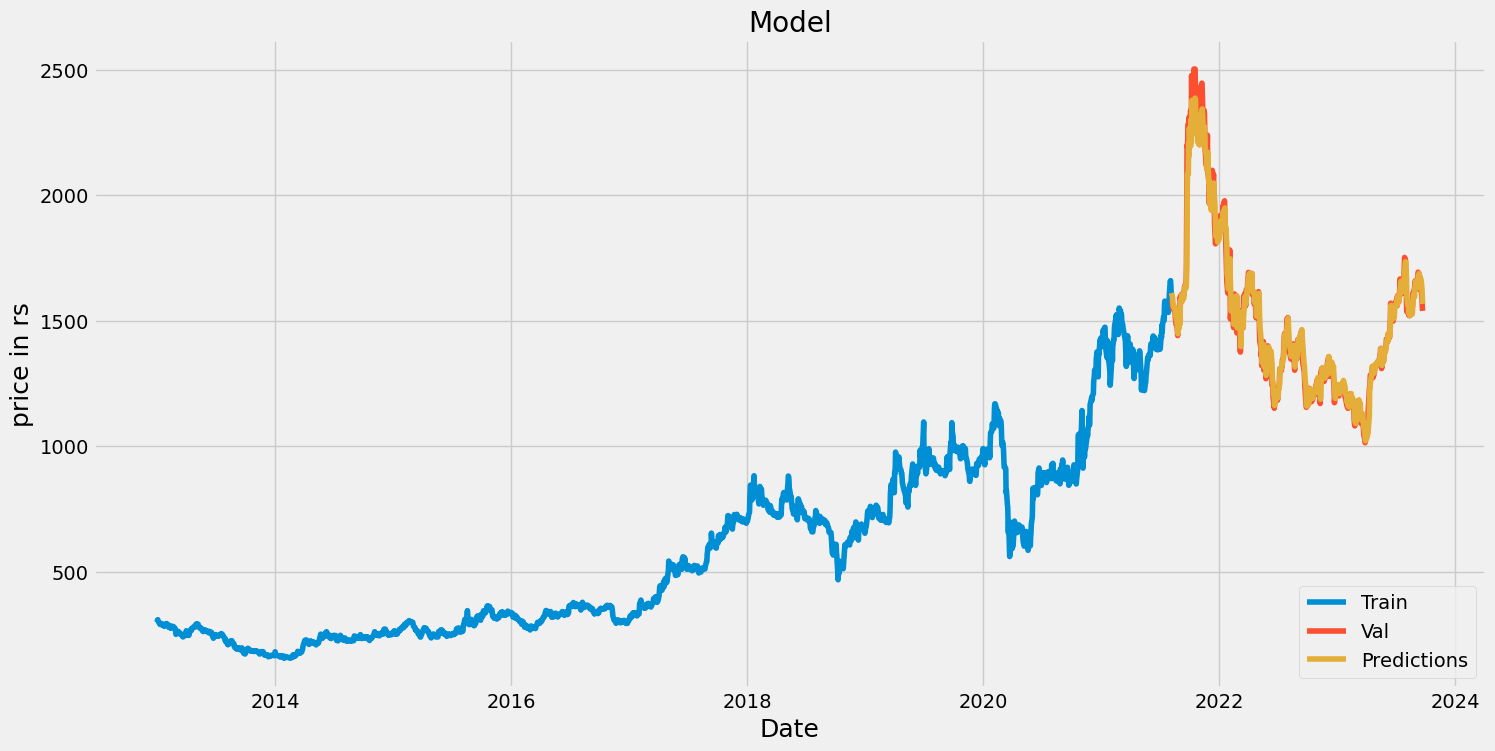

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('price in rs',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [25]:
close = valid.iloc[-1,:-1].values
close = close.tolist()
close_p = close[0]
predict = valid.iloc[-1,1:].values
predict = predict.tolist()
predict_p = predict[0]

In [26]:
Error = (abs(predict_p - close_p)/(close_p))*100
print('The error rate between actual close and predicted close is ', Error)

The error rate between actual close and predicted close is  1.7992281361431397


In [27]:
pwd

'C:\\Users\\bedar'

In [33]:
valid

,Close,Predictions
Date,,
2021-08-06,1582.599976,1610.272705
2021-08-09,1562.949951,1594.084839
2021-08-10,1548.699951,1575.746338
2021-08-11,1546.000000,1560.718384
2021-08-12,1557.000000,1554.647217
...,...,...
2023-09-15,1660.849976,1671.071533
2023-09-18,1621.349976,1656.796265
2023-09-20,1588.400024,1625.209106


In [39]:
valid.to_csv("C:/Users/bedar/OneDrive/Desktop/GODREJOutput.csv",encoding='utf-8')